In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df_metas = pd.read_csv("gdrive/MyDrive/Indiv/gene_expression/metas/metasMsig.csv")
df_metas_info = pd.read_csv("gdrive/MyDrive/Indiv/gene_expression/metas/metasMsigInfo.csv")

In [ ]:
df_colon = pd.read_csv("gdrive/MyDrive/Indiv/gene_expression/colon/colonMsig.csv")
df_colon_info = pd.read_csv("gdrive/MyDrive/Indiv/gene_expression/colon/colonMsigInfo.csv")

In [ ]:
df_colon_info["dataset"].value_counts()

PETACC3     526
GSE39582    466
TCGA        459
KFSYSCC     229
GSE17536    147
GSE14333    129
GSE13294    124
GSE37892    107
GSE13067     57
GSE20916     45
GSE23878     24
Name: dataset, dtype: int64

In [ ]:
df_metas_info["dataset"].value_counts()

GSE20685          204
GSE25066          170
GSE17705          150
GSE11121          107
GSE19615           74
GSE6532_GPL96      70
GSE2603            61
GSE7390            52
GSE16446           36
GSE6532_GPL570     25
Name: dataset, dtype: int64

#Explore Data

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=7eaab760d16a18e565d3137058c52832ba1849968dc8720f2512762dbdd263c6
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=3ccd215634d0f966d99f4aaaa0658b72e55e4fbbd0eb27ae8eeb86de610e5391
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
import umap
umap = umap.UMAP()

##Explore Metas

In [ ]:
df_metas

,IMPA2,LOXL1,KCNJ16,CD70,MAP3K10,CCL1,GLRX,OPHN1,CDC25C,FBXL2,...,CCT6A,RNF216,CCNO,SLC2A3,PARG,NPY,SHMT2,CXCL3,S100A6,SGCD
0,10.155105,8.718406,6.272254,7.307661,7.952958,6.955277,8.708262,9.079705,6.867708,7.521171,...,8.927337,7.641319,7.269094,8.076844,7.352034,7.020936,10.004728,6.352938,9.428596,7.342029
1,8.600774,9.150402,6.149019,7.236380,7.890624,6.726404,8.987518,9.116882,6.741572,7.513282,...,8.652472,7.552056,6.799497,7.426579,7.178559,6.864072,8.928130,6.422802,10.920254,7.371926
2,8.033863,9.532672,6.278557,7.295689,7.847053,6.810837,8.290170,8.950600,6.776794,7.643114,...,8.590419,7.502446,6.975076,7.055794,7.322690,6.926129,9.193236,6.454084,9.971248,7.398026
3,7.885192,8.875007,6.302014,7.400253,7.954243,6.759016,8.486913,9.096109,6.686170,7.475462,...,8.737272,7.564704,7.560436,7.184704,7.509381,6.927997,9.258725,6.612606,9.364361,7.231310
4,9.754245,8.847891,6.202592,7.422757,7.819141,6.894909,9.535679,8.608599,6.731587,7.539610,...,9.191101,7.308231,7.168264,7.285338,7.498480,6.993770,9.364361,6.572541,11.227591,7.259101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,8.945594,8.514331,6.494782,7.474428,8.080558,6.854835,7.979259,9.295846,7.265448,7.323655,...,8.418383,7.535079,7.392632,7.304403,6.846418,7.106180,9.481764,6.510591,11.989057,7.493569
945,8.533690,8.187585,6.438481,7.606221,7.894902,6.886880,8.965420,9.217847,7.072239,7.030650,...,9.294623,7.433675,7.253661,7.414498,7.032701,7.076885,10.608991,6.589637,10.787353,7.279199
946,7.655748,8.886347,6.554972,7.617836,8.074903,6.795536,8.446688,11.236884,7.257374,7.225365,...,7.944390,7.570055,7.323764,8.163907,6.896446,7.225057,9.300658,6.588590,11.196651,7.528549
947,7.174717,8.890299,6.570030,7.921757,8.498662,6.954172,8.615051,11.904363,7.560915,7.371046,...,7.923324,7.922612,8.203742,7.596898,6.978891,7.242056,9.328233,6.600057,10.829008,7.687931


In [ ]:
df_metas_info

,metas,subtype,dataset,technology,geo
0,metastasis,Her2,GSE7390,GPL96,GSM177885
1,metastasis,Basal,GSE7390,GPL96,GSM177887
2,metastasis,Her2,GSE7390,GPL96,GSM177894
3,metastasis,LumB,GSE7390,GPL96,GSM177895
4,metastasis,Her2,GSE7390,GPL96,GSM177899
...,...,...,...,...,...
944,non-metastasis,Basal,GSE25066,GPL96,GSM615763
945,non-metastasis,Basal,GSE25066,GPL96,GSM615764
946,non-metastasis,Normal,GSE25066,GPL96,GSM615766
947,non-metastasis,LumA,GSE25066,GPL96,GSM615768


In [ ]:
df_metas_scale = scaler.fit_transform(df_metas)
df_metas_pca = pca.fit_transform(df_metas_scale)
df_metas_tsne = tsne.fit_transform(df_metas_scale)
df_metas_umap = umap.fit_transform(df_metas_scale)

In [ ]:
df_metas_plot = pd.concat([df_metas_info, pd.DataFrame(df_metas_pca, columns=["PC1", "PC2"]), pd.DataFrame(df_metas_tsne, columns=["T1", "T2"]), pd.DataFrame(df_metas_umap, columns=["U1", "U2"])], axis=1)
df_metas_plot

,metas,subtype,dataset,technology,geo,PC1,PC2,T1,T2,U1,U2
0,metastasis,Her2,GSE7390,GPL96,GSM177885,-2.638080,3.875294,0.044922,-8.359426,-14.137679,8.526002
1,metastasis,Basal,GSE7390,GPL96,GSM177887,-5.424404,10.090498,-2.069359,-8.256527,-14.469708,8.544894
2,metastasis,Her2,GSE7390,GPL96,GSM177894,-5.551668,-6.486935,-0.776836,-10.016951,-14.264950,8.482470
3,metastasis,LumB,GSE7390,GPL96,GSM177895,-1.208808,3.184177,-1.310903,-10.307361,-14.188261,8.509121
4,metastasis,Her2,GSE7390,GPL96,GSM177899,-6.933042,29.305890,-3.769578,-10.985093,-14.344266,8.698753
...,...,...,...,...,...,...,...,...,...,...,...
944,non-metastasis,Basal,GSE25066,GPL96,GSM615763,23.547264,22.556402,32.956398,11.008329,-0.090818,-6.675775
945,non-metastasis,Basal,GSE25066,GPL96,GSM615764,17.531581,32.699535,31.688744,7.807373,-0.125714,-6.397310
946,non-metastasis,Normal,GSE25066,GPL96,GSM615766,30.141385,-9.865657,21.869013,2.730732,-0.450052,-8.449742
947,non-metastasis,LumA,GSE25066,GPL96,GSM615768,50.465543,-15.570515,39.954819,-0.481843,-1.408010,-7.498507


Text(0.5, 1.0, 'PCA metas')

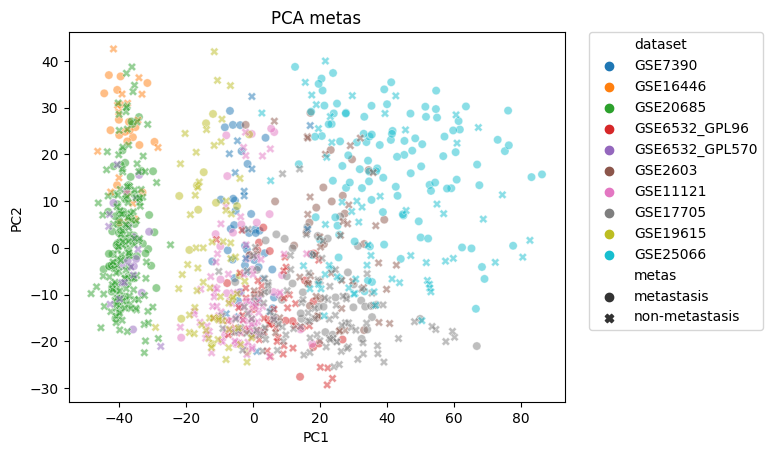

In [ ]:
sns.scatterplot(data=df_metas_plot, x="PC1", y="PC2", hue="dataset", style="metas", alpha=.5)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)
plt.title("PCA metas")

Text(0.5, 1.0, 'T-SNE metas')

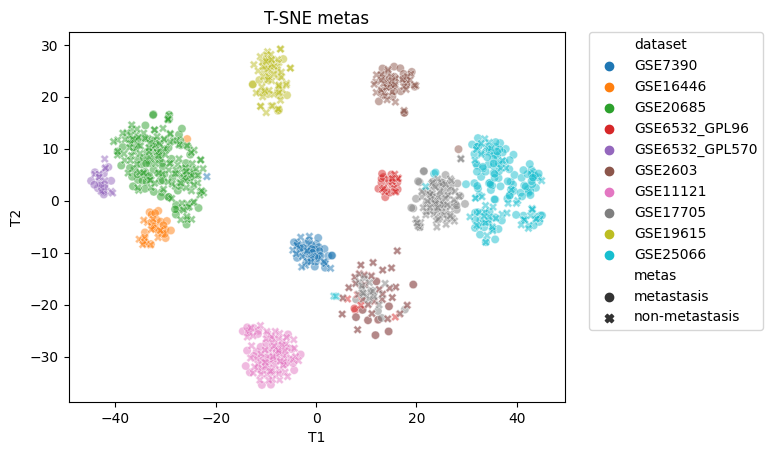

In [ ]:
sns.scatterplot(data=df_metas_plot, x="T1", y="T2", hue="dataset", style="metas", alpha=.5)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)
plt.title("T-SNE metas")

Text(0.5, 1.0, 'UMAP metas')

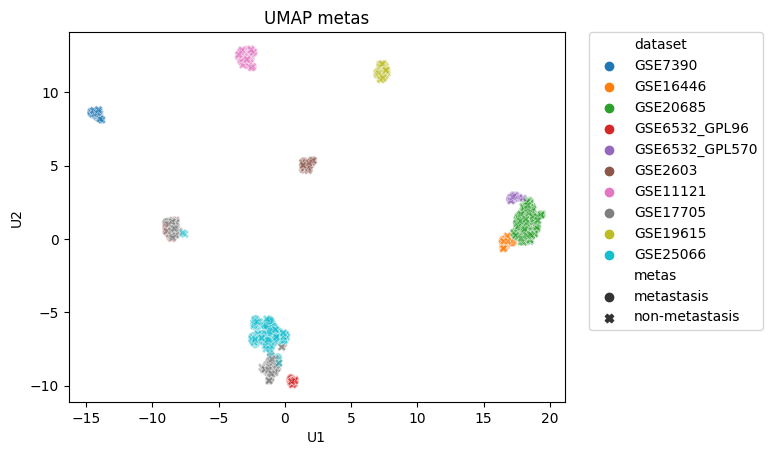

In [ ]:
sns.scatterplot(data=df_metas_plot, x="U1", y="U2", hue="dataset", style="metas", alpha=.5)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)
plt.title("UMAP metas")

##Explore Colon

In [ ]:
df_colon

,IMPA2,LOXL1,RPL18,ACTR5,MYL6B,MAP3K10,PTGER3,GLRX,OPHN1,HYAL1,...,PARG,NPY,SHMT2,CXCL3,THSD7A,S100A6,ATP8B1,SGCD,DNAJC10,XRCC2
0,9.715593,6.119447,9.877615,6.823653,8.695925,6.493740,3.926433,8.938508,9.696889,5.003911,...,5.407431,4.527929,8.497104,9.032308,3.775012,9.792082,10.446152,4.539896,7.015893,6.466477
1,8.480833,7.440636,9.720220,7.069099,7.089165,6.653807,4.467926,9.530089,9.264259,4.817700,...,5.547465,4.774293,8.049360,8.752456,4.158040,10.056473,9.717967,5.041545,7.395191,6.462391
2,7.785415,8.913530,9.516547,6.090761,7.611448,6.482613,4.923188,9.057229,10.516014,5.790984,...,5.158496,4.680301,7.023074,7.213761,6.290977,8.835413,9.734929,6.025065,6.746782,6.941392
3,8.118974,7.487467,9.633099,6.744747,7.978661,6.555650,4.101295,9.051317,10.070508,5.479385,...,5.474399,5.990768,7.851479,10.243829,4.867970,9.626902,9.818829,5.165661,7.587440,6.997995
4,7.865038,6.833043,9.699759,7.125417,8.977738,6.661172,4.211461,8.525409,9.736132,5.409761,...,5.430506,4.805515,8.745253,8.526847,4.496769,9.423321,9.594046,5.129301,7.014750,8.190629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308,10.423373,8.490722,14.162529,8.355866,8.359199,7.224309,4.707916,9.760249,8.361250,7.581763,...,9.298241,0.101510,11.543702,9.536495,1.697531,14.152775,13.163105,5.868877,11.283522,5.934145
2309,8.866605,7.825360,13.461018,8.937819,8.532590,7.048105,6.477558,9.016039,7.821134,6.340640,...,9.158365,-0.133220,12.241245,8.162927,2.915915,13.613230,11.326365,6.672558,11.248341,7.768592
2310,9.828355,8.778092,14.228159,8.730466,8.318448,8.183165,6.768226,8.768166,8.899283,4.910654,...,9.012751,0.101510,12.009137,7.415343,5.498247,13.969935,11.055441,8.313344,10.560057,7.421032
2311,8.507317,7.623327,14.243176,8.348360,7.326099,7.404458,6.217675,9.269887,7.783238,4.233080,...,8.797156,0.101510,11.238815,9.130567,2.159473,14.722272,12.208101,7.164168,12.032735,6.563829


In [ ]:
df_colon_info

,singleCell,dataset,technology,CMS
0,COLON018,KFSYSCC,Microarray,CMS2
1,COLON019,KFSYSCC,Microarray,CMS2
2,COLON020,KFSYSCC,Microarray,CMS4
3,COLON021,KFSYSCC,Microarray,CMS4
4,COLON022,KFSYSCC,Microarray,CMS2
...,...,...,...,...
2308,TCGA-AH-6903,TCGA,RNA-seq,CMS2
2309,TCGA-AG-A036,TCGA,RNA-seq,CMS2
2310,TCGA-D5-6924,TCGA,RNA-seq,CMS4
2311,TCGA-EF-5831,TCGA,RNA-seq,CMS2


In [ ]:
df_colon_scale = scaler.fit_transform(df_colon)
df_colon_pca = pca.fit_transform(df_colon_scale)
df_colon_tsne = tsne.fit_transform(df_colon_scale)
df_colon_umap = umap.fit_transform(df_colon_scale)

In [ ]:
df_colon_plot = pd.concat([df_colon_info, pd.DataFrame(df_colon_pca, columns=["PC1", "PC2"]), pd.DataFrame(df_colon_tsne, columns=["T1", "T2"]), pd.DataFrame(df_colon_umap, columns=["U1", "U2"])], axis=1)
df_colon_plot

,singleCell,dataset,technology,CMS,PC1,PC2,T1,T2,U1,U2
0,COLON018,KFSYSCC,Microarray,CMS2,9.249895,-18.954574,-3.501965,-8.569798,10.530196,7.819777
1,COLON019,KFSYSCC,Microarray,CMS2,6.887869,-20.016751,-4.315807,-19.424223,9.805470,7.720935
2,COLON020,KFSYSCC,Microarray,CMS4,5.550893,-23.496200,7.311401,-45.676250,8.731554,3.753007
3,COLON021,KFSYSCC,Microarray,CMS4,7.165590,-23.467227,3.967034,-31.709633,9.107687,5.310666
4,COLON022,KFSYSCC,Microarray,CMS2,4.421015,-20.501760,-5.764256,-18.680466,10.001343,7.960650
...,...,...,...,...,...,...,...,...,...,...
2308,TCGA-AH-6903,TCGA,RNA-seq,CMS2,80.291017,34.934205,29.234741,34.334705,-4.136184,-2.257967
2309,TCGA-AG-A036,TCGA,RNA-seq,CMS2,84.592556,30.545764,40.052322,32.166958,-3.452296,-3.057043
2310,TCGA-D5-6924,TCGA,RNA-seq,CMS4,89.042954,29.647360,37.048748,21.480989,-2.573308,-2.473191
2311,TCGA-EF-5831,TCGA,RNA-seq,CMS2,78.164509,39.494427,37.570354,30.122736,-3.391633,-2.908858


Text(0.5, 1.0, 'PCA colon')

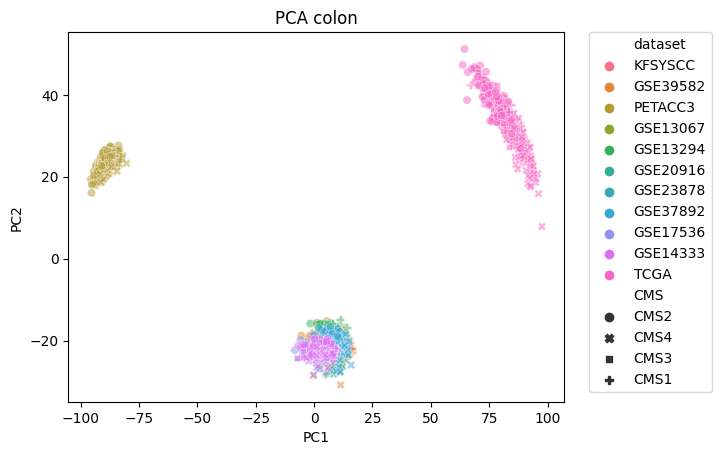

In [ ]:
sns.scatterplot(data=df_colon_plot, x="PC1", y="PC2", hue="dataset", style="CMS", alpha=.5)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)
plt.title("PCA colon")

Text(0.5, 1.0, 'T-SNE colon')

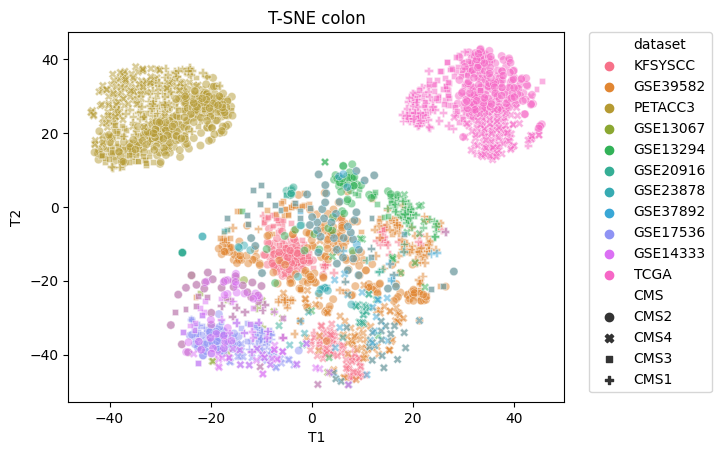

In [ ]:
sns.scatterplot(data=df_colon_plot, x="T1", y="T2", hue="dataset", style="CMS", alpha=.5)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)
plt.title("T-SNE colon")

Text(0.5, 1.0, 'UMAP colon')

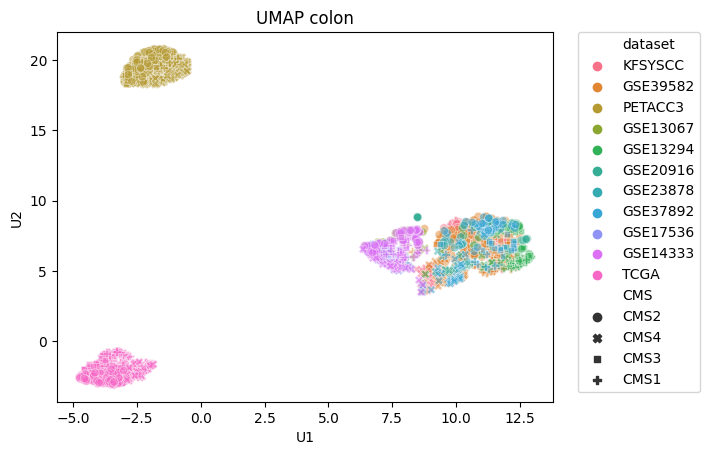

In [ ]:
sns.scatterplot(data=df_colon_plot, x="U1", y="U2", hue="dataset", style="CMS", alpha=.5)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)
plt.title("UMAP colon")

#Colon

In [ ]:
colon = pd.concat([df_colon, df_colon_info[["dataset", "CMS"]]], axis=1)

In [ ]:
colon["CMS"].value_counts()

CMS2    1027
CMS4     594
CMS1     374
CMS3     318
Name: CMS, dtype: int64

In [ ]:
dataset = ["GSE39582", "KFSYSCC", "GSE17536", "GSE14333", "GSE13294", "GSE37892", "GSE13067", "GSE20916", "GSE23878", "PETACC3", "TCGA"]

In [ ]:
rf = RandomForestClassifier()
scaler = StandardScaler()

###Accuracy on each dataset

In [ ]:
score = []

In [ ]:
for d in dataset:
  # split data
  train, test = train_test_split(colon[colon["dataset"] == d], test_size=0.2, random_state=42)
  X_train = train.drop(["dataset","CMS"], axis=1)
  y_train = train["CMS"]
  X_test = test.drop(["dataset","CMS"], axis=1)
  y_test = test["CMS"]

  # preprocessing
  X_train_scale = scaler.fit_transform(X_train)
  X_test_scale = scaler.transform(X_test)

  # train
  rf.fit(X_train_scale, y_train)
  y_pred = rf.predict(X_test_scale)

  score.append((d, accuracy_score(y_test, y_pred)))

In [ ]:
score

[('GSE39582', 0.925531914893617),
 ('KFSYSCC', 0.9347826086956522),
 ('GSE17536', 0.8333333333333334),
 ('GSE14333', 0.8461538461538461),
 ('GSE13294', 0.88),
 ('GSE37892', 0.9545454545454546),
 ('GSE13067', 0.5833333333333334),
 ('GSE20916', 0.6666666666666666),
 ('GSE23878', 0.8),
 ('PETACC3', 0.8113207547169812),
 ('TCGA', 0.8586956521739131)]

###All dataset

In [ ]:
train, test = train_test_split(colon, test_size=0.2, random_state=42)
X_train = train.drop(["dataset","CMS"], axis=1)
y_train = train["CMS"]
X_test = test.drop(["dataset","CMS"], axis=1)
y_test = test["CMS"]

# preprocessing
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

# train
rf.fit(X_train_scale, y_train)
y_pred = rf.predict(X_test_scale)

print("All: ", accuracy_score(y_test, y_pred))

All:  0.8855291576673866


##OOD

In [ ]:
ID = ["GSE39582", "KFSYSCC", "GSE17536", "GSE14333", "GSE13294", "GSE37892", "GSE13067", "GSE20916", "GSE23878"]
OOD = ["PETACC3", "TCGA"]

In [ ]:
colon_train = colon.drop(colon[colon["dataset"].isin(OOD)].index)
colon_TCGA = colon[colon["dataset"].isin(["TCGA"])]
colon_PETACC3 = colon[colon["dataset"].isin(["PETACC3"])]

In [ ]:
colon_train["dataset"].value_counts()

GSE39582    466
KFSYSCC     229
GSE17536    147
GSE14333    129
GSE13294    124
GSE37892    107
GSE13067     57
GSE20916     45
GSE23878     24
Name: dataset, dtype: int64

In [ ]:
colon_train["CMS"].value_counts()

CMS2    582
CMS4    334
CMS1    229
CMS3    183
Name: CMS, dtype: int64

In [ ]:
colon_TCGA["dataset"].value_counts()

TCGA    459
Name: dataset, dtype: int64

In [ ]:
colon_TCGA["CMS"].value_counts()

CMS2    208
CMS4    119
CMS1     68
CMS3     64
Name: CMS, dtype: int64

In [ ]:
colon_PETACC3["dataset"].value_counts()

PETACC3    526
Name: dataset, dtype: int64

In [ ]:
colon_PETACC3["CMS"].value_counts()

CMS2    237
CMS4    141
CMS1     77
CMS3     71
Name: CMS, dtype: int64

In [ ]:
X_colon_train = colon_train.drop(["dataset","CMS"], axis=1)
y_colon_train = colon_train["CMS"]
X_colon_TCGA = colon_TCGA.drop(["dataset","CMS"], axis=1)
y_colon_TCGA = colon_TCGA["CMS"]
X_colon_PETACC3 = colon_PETACC3.drop(["dataset","CMS"], axis=1)
y_colon_PETACC3 = colon_PETACC3["CMS"]

In [ ]:
X_colon_train_scale = scaler.fit_transform(X_colon_train)
X_colon_TCGA_scale = scaler.transform(X_colon_TCGA)
X_colon_PETACC3_scale = scaler.transform(X_colon_PETACC3)

In [ ]:
rf.fit(X_colon_train_scale, y_colon_train)
y_pred_TCGA_psudo = rf.predict(X_colon_TCGA_scale)
y_pred_PETACC3_psudo = rf.predict(X_colon_PETACC3_scale)

In [ ]:
print("predict on OOD")
print("TCGA: ", accuracy_score(y_colon_TCGA, y_pred_TCGA_psudo))
print("PETACC3: ", accuracy_score(y_colon_PETACC3, y_pred_PETACC3_psudo))

predict on OOD
TCGA:  0.4444444444444444
PETACC3:  0.20342205323193915


**Test with other different distribution**

TCGA -> ID

In [ ]:
X_colon_TCGA_scale = scaler.fit_transform(X_colon_TCGA)
X_colon_PETACC3_scale = scaler.transform(X_colon_PETACC3)
X_colon_train_scale = scaler.transform(X_colon_train)

In [ ]:
rf.fit(X_colon_TCGA_scale, y_colon_TCGA)
y_pred_PETACC3 = rf.predict(X_colon_PETACC3_scale)
y_pred_train = rf.predict(X_colon_train_scale)

In [ ]:
print("predict on OOD")
print("PETACC3: ", accuracy_score(y_colon_PETACC3, y_pred_PETACC3))
print("Train: ", accuracy_score(y_colon_train, y_pred_train))

predict on OOD
PETACC3:  0.1844106463878327
Train:  0.3117469879518072


PETACC3 -> ID

In [ ]:
X_colon_PETACC3_scale = scaler.fit_transform(X_colon_PETACC3)
X_colon_TCGA_scale = scaler.transform(X_colon_TCGA)
X_colon_train_scale = scaler.transform(X_colon_train)

In [ ]:
rf.fit(X_colon_PETACC3_scale, y_colon_PETACC3)
y_pred_TCGA = rf.predict(X_colon_TCGA_scale)
y_pred_train = rf.predict(X_colon_train_scale)

In [ ]:
print("predict on OOD")
print("TCGA: ", accuracy_score(y_colon_TCGA, y_pred_TCGA))
print("Train: ", accuracy_score(y_colon_train, y_pred_train))

predict on OOD
TCGA:  0.14814814814814814
Train:  0.2748493975903614


##Psudo label

In [ ]:
print("predict on OOD")
print("TCGA: ", accuracy_score(y_colon_TCGA, y_pred_TCGA_psudo))
print("PETACC3: ", accuracy_score(y_colon_PETACC3, y_pred_PETACC3_psudo))

predict on OOD
TCGA:  0.4444444444444444
PETACC3:  0.20342205323193915


###TCGA Psudo

In [ ]:
pd.DataFrame(y_pred_TCGA_psudo, columns=["CMS"]).value_counts()

CMS 
CMS2    244
CMS1    182
CMS4     32
CMS3      1
dtype: int64

In [ ]:
colon_TCGA["CMS"].value_counts()

CMS2    208
CMS4    119
CMS1     68
CMS3     64
Name: CMS, dtype: int64

In [ ]:
colon_psudo_TCGA = pd.concat([X_colon_TCGA.reset_index(drop=True), pd.DataFrame(y_pred_TCGA_psudo, columns=["CMS"])], axis=1)

In [ ]:
colon_psudo_TCGA_train, colon_psudo_TCGA_test = train_test_split(colon_psudo_TCGA, test_size=0.2, random_state=42)

In [ ]:
colon_psudo_TCGA_test = colon_TCGA.reset_index(drop=True).loc[list(colon_psudo_TCGA_test.index)]

In [ ]:
colon_psudo_TCGA_train = pd.concat([colon_train.drop(["dataset"], axis=1), colon_psudo_TCGA_train], axis=0)
colon_psudo_TCGA_train.reset_index(drop=True)

,IMPA2,LOXL1,RPL18,ACTR5,MYL6B,MAP3K10,PTGER3,GLRX,OPHN1,HYAL1,...,NPY,SHMT2,CXCL3,THSD7A,S100A6,ATP8B1,SGCD,DNAJC10,XRCC2,CMS
0,9.715593,6.119447,9.877615,6.823653,8.695925,6.493740,3.926433,8.938508,9.696889,5.003911,...,4.527929,8.497104,9.032308,3.775012,9.792082,10.446152,4.539896,7.015893,6.466477,CMS2
1,8.480833,7.440636,9.720220,7.069099,7.089165,6.653807,4.467926,9.530089,9.264259,4.817700,...,4.774293,8.049360,8.752456,4.158040,10.056473,9.717967,5.041545,7.395191,6.462391,CMS2
2,7.785415,8.913530,9.516547,6.090761,7.611448,6.482613,4.923188,9.057229,10.516014,5.790984,...,4.680301,7.023074,7.213761,6.290977,8.835413,9.734929,6.025065,6.746782,6.941392,CMS4
3,8.118974,7.487467,9.633099,6.744747,7.978661,6.555650,4.101295,9.051317,10.070508,5.479385,...,5.990768,7.851479,10.243829,4.867970,9.626902,9.818829,5.165661,7.587440,6.997995,CMS4
4,7.865038,6.833043,9.699759,7.125417,8.977738,6.661172,4.211461,8.525409,9.736132,5.409761,...,4.805515,8.745253,8.526847,4.496769,9.423321,9.594046,5.129301,7.014750,8.190629,CMS2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,10.198211,6.960685,15.248767,8.639462,8.118274,8.048310,1.695139,8.294719,7.613027,5.014224,...,-0.133220,12.500401,8.440702,-0.134627,13.292219,11.311211,4.851526,10.842824,6.558004,CMS2
1691,11.243336,8.947920,14.556074,7.696185,8.259911,8.320040,5.120040,9.735319,7.587043,9.712452,...,0.101510,11.247088,8.075853,2.901511,14.885936,12.580167,6.266201,10.940278,5.557328,CMS1
1692,9.182711,6.992675,15.207267,8.203486,9.173611,7.016973,4.140321,9.695400,8.361718,4.616538,...,0.850737,11.762494,9.965727,3.640872,14.763825,10.945222,5.861496,10.849937,5.826121,CMS2
1693,10.327347,8.594728,14.820873,7.629388,7.757193,7.893123,4.218626,11.349611,7.066642,9.252154,...,0.101510,12.634612,9.737499,3.160706,16.383753,12.390014,5.856598,12.183996,4.807427,CMS1


In [ ]:
X_train = colon_psudo_TCGA_train.drop(["CMS"], axis=1)
y_train = colon_psudo_TCGA_train["CMS"]
X_test = colon_psudo_TCGA_test.drop(["CMS", "dataset"], axis=1)
y_test = colon_psudo_TCGA_test["CMS"]

In [ ]:
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
rf.fit(X_train_scale, y_train)
y_pred = rf.predict(X_test_scale)
print("TCGA Psudo: ", accuracy_score(y_test, y_pred))

TCGA Psudo:  0.5543478260869565


###PETACC3 Psudo

In [ ]:
pd.DataFrame(y_pred_PETACC3_psudo, columns=["CMS"]).value_counts()

CMS 
CMS3    440
CMS2     50
CMS4     36
dtype: int64

In [ ]:
colon_PETACC3["CMS"].value_counts()

CMS2    237
CMS4    141
CMS1     77
CMS3     71
Name: CMS, dtype: int64

In [ ]:
colon_psudo_PETACC3 = pd.concat([X_colon_PETACC3.reset_index(drop=True), pd.DataFrame(y_pred_PETACC3_psudo, columns=["CMS"])], axis=1)

In [ ]:
colon_psudo_PETACC3_train, colon_psudo_PETACC3_test = train_test_split(colon_psudo_PETACC3, test_size=0.2, random_state=42)

In [ ]:
colon_psudo_PETACC3_test = colon_PETACC3.reset_index(drop=True).loc[list(colon_psudo_PETACC3_test.index)]

In [ ]:
colon_psudo_PETACC3_train = pd.concat([colon_train.drop(["dataset"], axis=1), colon_psudo_PETACC3_train], axis=0)
colon_psudo_PETACC3_train.reset_index(drop=True)

,IMPA2,LOXL1,RPL18,ACTR5,MYL6B,MAP3K10,PTGER3,GLRX,OPHN1,HYAL1,...,NPY,SHMT2,CXCL3,THSD7A,S100A6,ATP8B1,SGCD,DNAJC10,XRCC2,CMS
0,9.715593,6.119447,9.877615,6.823653,8.695925,6.493740,3.926433,8.938508,9.696889,5.003911,...,4.527929,8.497104,9.032308,3.775012,9.792082,10.446152,4.539896,7.015893,6.466477,CMS2
1,8.480833,7.440636,9.720220,7.069099,7.089165,6.653807,4.467926,9.530089,9.264259,4.817700,...,4.774293,8.049360,8.752456,4.158040,10.056473,9.717967,5.041545,7.395191,6.462391,CMS2
2,7.785415,8.913530,9.516547,6.090761,7.611448,6.482613,4.923188,9.057229,10.516014,5.790984,...,4.680301,7.023074,7.213761,6.290977,8.835413,9.734929,6.025065,6.746782,6.941392,CMS4
3,8.118974,7.487467,9.633099,6.744747,7.978661,6.555650,4.101295,9.051317,10.070508,5.479385,...,5.990768,7.851479,10.243829,4.867970,9.626902,9.818829,5.165661,7.587440,6.997995,CMS4
4,7.865038,6.833043,9.699759,7.125417,8.977738,6.661172,4.211461,8.525409,9.736132,5.409761,...,4.805515,8.745253,8.526847,4.496769,9.423321,9.594046,5.129301,7.014750,8.190629,CMS2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,2.199000,9.323905,7.118350,3.976687,3.459125,5.879757,1.767892,4.785110,2.673670,4.105565,...,1.521710,5.024930,6.037150,1.914065,7.060640,3.421106,1.891420,3.990856,3.989480,CMS3
1744,3.034700,8.393380,7.335215,3.627770,3.184460,4.999730,1.812983,4.361563,5.594780,4.063225,...,1.766040,4.964350,5.212890,1.963523,5.752710,3.525846,2.691410,4.259033,5.195055,CMS2
1745,3.327500,6.971270,7.314980,3.671783,3.606645,4.685252,1.640917,4.830793,5.273470,4.223820,...,1.574165,4.579923,3.649380,1.888630,6.199410,4.013698,2.014190,4.622207,4.995665,CMS3
1746,5.924160,9.125805,6.847087,3.617640,2.781860,4.322420,2.086415,4.878480,4.274300,4.236940,...,1.683645,4.528120,6.892040,2.488773,4.551920,3.905212,3.011200,4.439829,3.792630,CMS2


In [ ]:
X_train = colon_psudo_PETACC3_train.drop(["CMS"], axis=1)
y_train = colon_psudo_PETACC3_train["CMS"]
X_test = colon_psudo_PETACC3_test.drop(["CMS", "dataset"], axis=1)
y_test = colon_psudo_PETACC3_test["CMS"]

In [ ]:
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
rf.fit(X_train_scale, y_train)
y_pred = rf.predict(X_test_scale)
print("PETACC3 Psudo: ", accuracy_score(y_test, y_pred))

PETACC3 Psudo:  0.1509433962264151


##Different % of TCGA, PETACC3 data

In [ ]:
rf_TCGA = RandomForestClassifier()
rf_PETACC3 = RandomForestClassifier()
scaler_TCGA = StandardScaler()
scaler_PETACC3 = StandardScaler()

In [ ]:
colon_TCGA_train, colon_TCGA_test = train_test_split(colon_TCGA, test_size=0.2, random_state=42)
colon_PETACC3_train, colon_PETACC3_test = train_test_split(colon_PETACC3, test_size=0.2, random_state=42)

In [ ]:
accuracy_TCGA = []
accuracy_PETACC3 = []
log_percent = []
percent = 0.00
interval = 0.05

In [ ]:
# 0 percent ood data
train_TCGA = colon_train
train_PETACC3 = colon_train

X_train_TCGA = train_TCGA.drop(["dataset","CMS"], axis=1)
y_train_TCGA = train_TCGA["CMS"]
X_test_TCGA = colon_TCGA_test.drop(["dataset","CMS"], axis=1)
y_test_TCGA = colon_TCGA_test["CMS"]

X_train_PETACC3 = train_PETACC3.drop(["dataset","CMS"], axis=1)
y_train_PETACC3 = train_PETACC3["CMS"]
X_test_PETACC3 = colon_PETACC3_test.drop(["dataset","CMS"], axis=1)
y_test_PETACC3 = colon_PETACC3_test["CMS"]

# preprocessing
X_train_TCGA_scale = scaler_TCGA.fit_transform(X_train_TCGA)
X_test_TCGA_scale = scaler_TCGA.transform(X_test_TCGA)

X_train_PETACC3_scale = scaler_PETACC3.fit_transform(X_train_PETACC3)
X_test_PETACC3_scale = scaler_PETACC3.transform(X_test_PETACC3)

# train
rf_TCGA.fit(X_train_TCGA_scale, y_train_TCGA)
rf_PETACC3.fit(X_train_PETACC3_scale, y_train_PETACC3)

y_pred_TCGA = rf_TCGA.predict(X_test_TCGA_scale)
y_pred_PETACC3 = rf_PETACC3.predict(X_test_PETACC3_scale)

accuracy_TCGA.append(accuracy_score(y_test_TCGA, y_pred_TCGA))
accuracy_PETACC3.append(accuracy_score(y_test_PETACC3, y_pred_PETACC3))
log_percent.append(round(percent, 2))
percent += interval

In [ ]:
while (percent < 1):
  # split data
  train_TCGA = pd.concat([colon_train, colon_TCGA_train.sample(frac=percent, random_state=42)], axis=0)
  train_PETACC3 = pd.concat([colon_train, colon_PETACC3_train.sample(frac=percent, random_state=42)], axis=0)

  X_train_TCGA = train_TCGA.drop(["dataset","CMS"], axis=1)
  y_train_TCGA = train_TCGA["CMS"]
  X_test_TCGA = colon_TCGA_test.drop(["dataset","CMS"], axis=1)
  y_test_TCGA = colon_TCGA_test["CMS"]

  X_train_PETACC3 = train_PETACC3.drop(["dataset","CMS"], axis=1)
  y_train_PETACC3 = train_PETACC3["CMS"]
  X_test_PETACC3 = colon_PETACC3_test.drop(["dataset","CMS"], axis=1)
  y_test_PETACC3 = colon_PETACC3_test["CMS"]

  # preprocessing
  X_train_TCGA_scale = scaler_TCGA.fit_transform(X_train_TCGA)
  X_test_TCGA_scale = scaler_TCGA.transform(X_test_TCGA)

  X_train_PETACC3_scale = scaler_PETACC3.fit_transform(X_train_PETACC3)
  X_test_PETACC3_scale = scaler_PETACC3.transform(X_test_PETACC3)

  # train
  rf_TCGA.fit(X_train_TCGA_scale, y_train_TCGA)
  rf_PETACC3.fit(X_train_PETACC3_scale, y_train_PETACC3)

  y_pred_TCGA = rf_TCGA.predict(X_test_TCGA_scale)
  y_pred_PETACC3 = rf_PETACC3.predict(X_test_PETACC3_scale)

  accuracy_TCGA.append(accuracy_score(y_test_TCGA, y_pred_TCGA))
  accuracy_PETACC3.append(accuracy_score(y_test_PETACC3, y_pred_PETACC3))
  log_percent.append(round(percent, 2))
  percent += interval

In [ ]:
# 100 percent ood data
train_TCGA = pd.concat([colon_train, colon_TCGA_train], axis=0)
train_PETACC3 = pd.concat([colon_train, colon_PETACC3_train], axis=0)

X_train_TCGA = train_TCGA.drop(["dataset","CMS"], axis=1)
y_train_TCGA = train_TCGA["CMS"]
X_test_TCGA = colon_TCGA_test.drop(["dataset","CMS"], axis=1)
y_test_TCGA = colon_TCGA_test["CMS"]

X_train_PETACC3 = train_PETACC3.drop(["dataset","CMS"], axis=1)
y_train_PETACC3 = train_PETACC3["CMS"]
X_test_PETACC3 = colon_PETACC3_test.drop(["dataset","CMS"], axis=1)
y_test_PETACC3 = colon_PETACC3_test["CMS"]

# preprocessing
X_train_TCGA_scale = scaler_TCGA.fit_transform(X_train_TCGA)
X_test_TCGA_scale = scaler_TCGA.transform(X_test_TCGA)

X_train_PETACC3_scale = scaler_PETACC3.fit_transform(X_train_PETACC3)
X_test_PETACC3_scale = scaler_PETACC3.transform(X_test_PETACC3)

# train
rf_TCGA.fit(X_train_TCGA_scale, y_train_TCGA)
rf_PETACC3.fit(X_train_PETACC3_scale, y_train_PETACC3)

y_pred_TCGA = rf_TCGA.predict(X_test_TCGA_scale)
y_pred_PETACC3 = rf_PETACC3.predict(X_test_PETACC3_scale)

accuracy_TCGA.append(accuracy_score(y_test_TCGA, y_pred_TCGA))
accuracy_PETACC3.append(accuracy_score(y_test_PETACC3, y_pred_PETACC3))
log_percent.append(round(percent, 2))
percent += interval

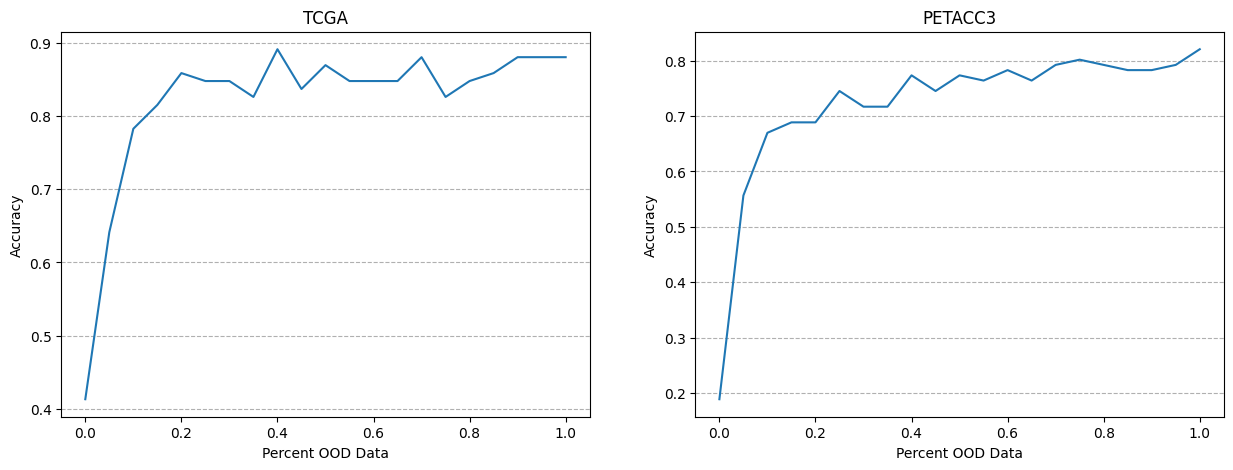

In [ ]:
x = np.array(log_percent)
y1 = np.array(accuracy_TCGA)
y2 = np.array(accuracy_PETACC3)

fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.lineplot(ax=ax[0], x=x, y=y1)
sns.lineplot(ax=ax[1], x=x, y=y2)

ax[0].set_title("TCGA")
ax[0].set_xlabel("Percent OOD Data")
ax[0].set_ylabel("Accuracy")
ax[0].grid(axis="y", linestyle='--')

ax[1].set_title("PETACC3")
ax[1].set_xlabel("Percent OOD Data")
ax[1].set_ylabel("Accuracy")
ax[1].grid(axis="y", linestyle='--')

plt.show()



---



In [ ]:
all_result_colon = []
rf = RandomForestClassifier()
scaler = StandardScaler()

In [ ]:
for d in dataset:
  ID = colon.drop(colon[colon["dataset"] == d].index)
  OOD = colon[colon["dataset"] == d]

  OOD_train, test = train_test_split(OOD, test_size=0.2, random_state=42)
  X_test = test.drop(["dataset", "CMS"], axis=1)
  y_test = test["CMS"]

  percent = 0;
  result = []
  log_percent = []

  while (percent <= 1):
    if (percent == 0):
      train = ID
    elif (percent == 1):
      train = pd.concat([ID, OOD_train], axis=0)
    else:
      train = pd.concat([ID, OOD_train.sample(frac=percent, random_state=42)], axis=0)

    X_train = train.drop(["dataset", "CMS"], axis=1)
    y_train = train["CMS"]

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    rf.fit(X_train_scaled, y_train)
    y_pred = rf.predict(X_test_scaled)

    result.append(round(accuracy_score(y_test, y_pred), 5))
    log_percent.append(round(percent, 2))
    percent += 0.1

  all_result_colon.append([d, result, log_percent])

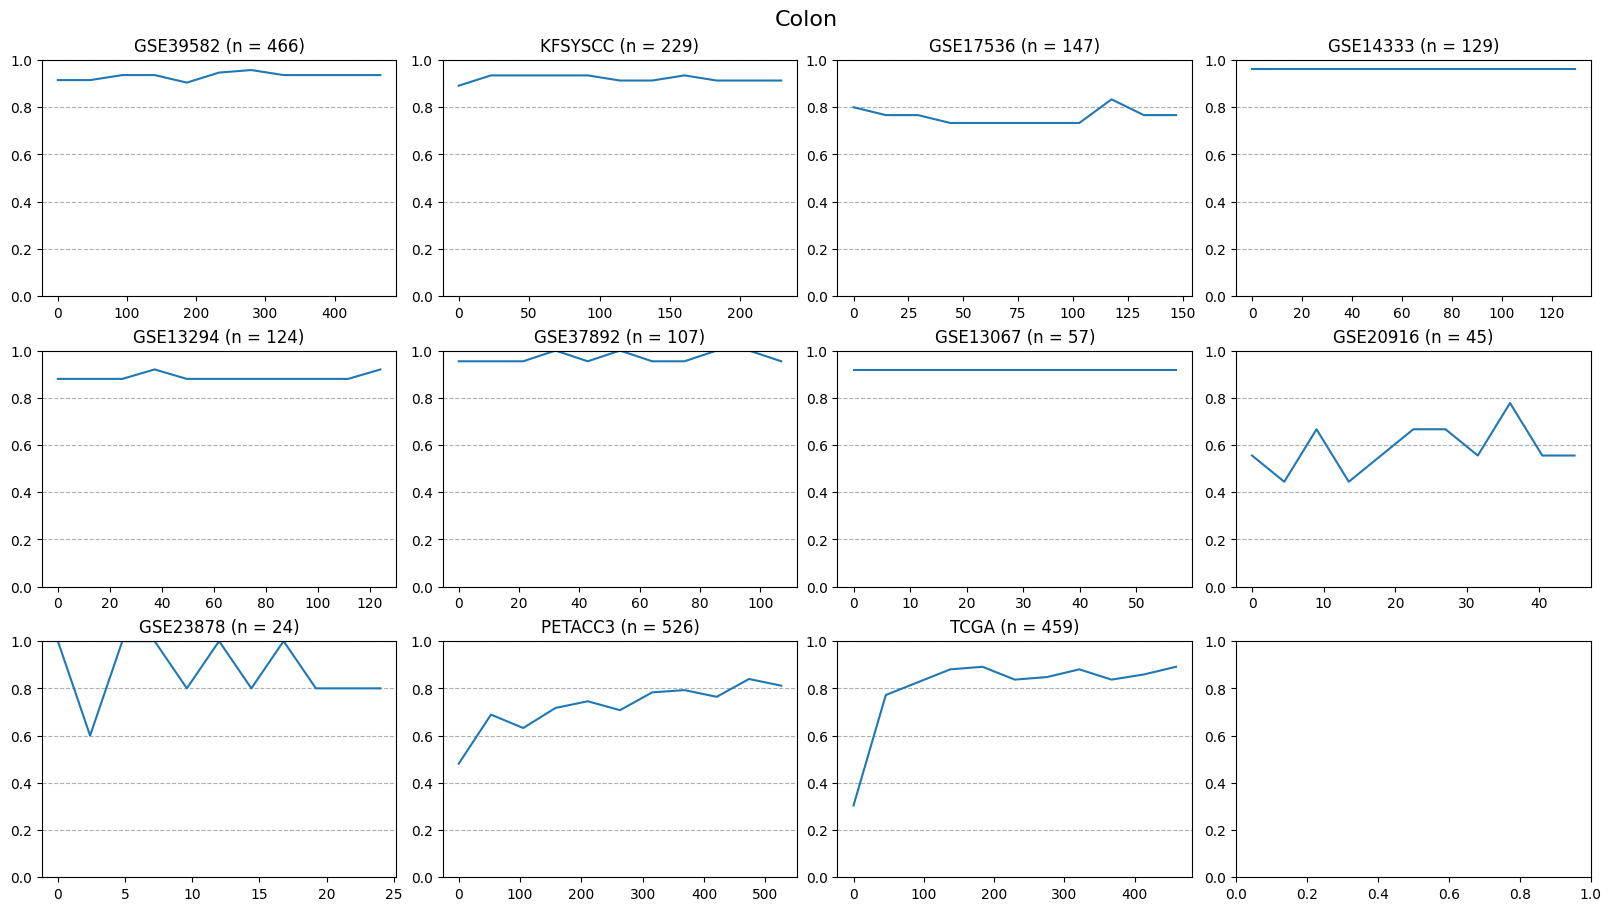

In [ ]:
fig, ax = plt.subplots(3, 4, figsize=(16, 9), layout='constrained')
# fig.tight_layout(pad=3)

for i in range(len(all_result_colon)):
  # x = np.array(all_result_colon[i][2])
  # y = np.array(all_result_colon[i][1])
  n = np.sum(colon["dataset"] == all_result_colon[i][0])

  sns.lineplot(ax=ax[i//4, i%4], x=np.array(all_result_colon[i][2])*n, y=np.array(all_result_colon[i][1]))

  ax[i//4, i%4].set_title(all_result_colon[i][0]+ " (n = " + str(n) + ")")
  # ax[i//4, i%4].set_xlabel("Datapoints")
  # ax[i//4, i%4].set_ylabel("Accuracy")
  ax[i//4, i%4].grid(axis="y", linestyle='--')
  ax[i//4, i%4].set_ylim(bottom=0, top=1)

fig.suptitle("Colon", fontsize=16)
plt.show()

#Metas

In [ ]:
rf = RandomForestClassifier()

In [ ]:
metas = pd.concat([df_metas, df_metas_info[["dataset", "metas"]]], axis=1)

In [ ]:
metas["dataset"].value_counts()

GSE20685          204
GSE25066          170
GSE17705          150
GSE11121          107
GSE19615           74
GSE6532_GPL96      70
GSE2603            61
GSE7390            52
GSE16446           36
GSE6532_GPL570     25
Name: dataset, dtype: int64

In [ ]:
metas["metas"].value_counts()

non-metastasis    571
metastasis        378
Name: metas, dtype: int64

In [ ]:
dataset = ["GSE20685", "GSE25066", "GSE17705", "GSE19615", "GSE6532_GPL96", "GSE2603", "GSE7390", "GSE16446", "GSE11121", "GSE6532_GPL570"]

###Accuracy on each dataset

In [ ]:
score = []

In [ ]:
for d in dataset:
  # split data
  train, test = train_test_split(metas[metas["dataset"].isin([d])], test_size=0.2, random_state=42)
  X_train = train.drop(["dataset","metas"], axis=1)
  y_train = train["metas"]
  X_test = test.drop(["dataset","metas"], axis=1)
  y_test = test["metas"]

  # preprocessing
  X_train_scale = scaler.fit_transform(X_train)
  X_test_scale = scaler.transform(X_test)

  # train
  rf.fit(X_train_scale, y_train)
  y_pred = rf.predict(X_test_scale)

  score.append((d, accuracy_score(y_test, y_pred)))

In [ ]:
score

[('GSE20685', 0.7560975609756098),
 ('GSE25066', 0.7352941176470589),
 ('GSE17705', 0.7),
 ('GSE19615', 0.6),
 ('GSE6532_GPL96', 0.42857142857142855),
 ('GSE2603', 0.6153846153846154),
 ('GSE7390', 0.6363636363636364),
 ('GSE16446', 0.625),
 ('GSE11121', 0.7272727272727273),
 ('GSE6532_GPL570', 0.6)]

###All dataset

In [ ]:
train, test = train_test_split(metas, test_size=0.2, random_state=42)
X_train = train.drop(["dataset","metas"], axis=1)
y_train = train["metas"]
X_test = test.drop(["dataset","metas"], axis=1)
y_test = test["metas"]

# preprocessing
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

# train
rf.fit(X_train_scale, y_train)
y_pred = rf.predict(X_test_scale)

print("All: ", accuracy_score(y_test, y_pred))

All:  0.7368421052631579


###OOD

In [ ]:
for d in dataset:
  OOD = [d]

  metas_train = metas.drop(metas[metas["dataset"].isin(OOD)].index)
  metas_test = metas[metas["dataset"].isin(OOD)]

  X_metas_train = metas_train.drop(["dataset","metas"], axis=1)
  y_metas_train = metas_train["metas"]
  X_metas_test = metas_test.drop(["dataset","metas"], axis=1)
  y_metas_test = metas_test["metas"]

  X_metas_train_scale = scaler.fit_transform(X_metas_train)
  X_metas_test_scale = scaler.transform(X_metas_test)

  rf.fit(X_metas_train_scale, y_metas_train)
  y_pred = rf.predict(X_metas_test_scale)

  print(d, ": ", accuracy_score(y_metas_test, y_pred))

GSE20685 :  0.5882352941176471
GSE25066 :  0.5764705882352941
GSE17705 :  0.78
GSE19615 :  0.7297297297297297
GSE6532_GPL96 :  0.7714285714285715
GSE2603 :  0.5901639344262295
GSE7390 :  0.46153846153846156
GSE16446 :  0.4166666666666667
GSE11121 :  0.7663551401869159
GSE6532_GPL570 :  0.56




---


In [ ]:
ood = "GSE11121"

In [ ]:
OOD = [ood]

In [ ]:
metas_train = metas.drop(metas[metas["dataset"].isin(OOD)].index)
metas_test = metas[metas["dataset"].isin(OOD)]

In [ ]:
metas_train["dataset"].value_counts()

GSE20685          204
GSE25066          170
GSE17705          150
GSE19615           74
GSE6532_GPL96      70
GSE2603            61
GSE7390            52
GSE16446           36
GSE6532_GPL570     25
Name: dataset, dtype: int64

In [ ]:
metas_train["metas"].value_counts()

non-metastasis    492
metastasis        350
Name: metas, dtype: int64

In [ ]:
metas_test["dataset"].value_counts()

GSE11121    107
Name: dataset, dtype: int64

In [ ]:
metas_test["metas"].value_counts()

non-metastasis    79
metastasis        28
Name: metas, dtype: int64

In [ ]:
X_metas_train = metas_train.drop(["dataset","metas"], axis=1)
y_metas_train = metas_train["metas"]
X_metas_test = metas_test.drop(["dataset","metas"], axis=1)
y_metas_test = metas_test["metas"]

In [ ]:
X_metas_train_scale = scaler.fit_transform(X_metas_train)
X_metas_test_scale = scaler.transform(X_metas_test)

In [ ]:
rf.fit(X_metas_train_scale, y_metas_train)
y_pred = rf.predict(X_metas_test_scale)

In [ ]:
print("predict on OOD")
print(ood, ": ", accuracy_score(y_metas_test, y_pred))

predict on OOD
GSE11121 :  0.7570093457943925


##Psudo label

In [ ]:
pd.DataFrame(y_pred, columns=["metas"]).value_counts()

metas         
non-metastasis    83
metastasis        24
dtype: int64

In [ ]:
metas_test["metas"].value_counts()

non-metastasis    79
metastasis        28
Name: metas, dtype: int64

In [ ]:
metas_psudo_OOD = pd.concat([X_metas_test.reset_index(drop=True), pd.DataFrame(y_pred, columns=["metas"])], axis=1)

In [ ]:
metas_psudo_OOD_train, metas_psudo_OOD_test = train_test_split(metas_psudo_OOD, test_size=0.2, random_state=42)

In [ ]:
metas_psudo_OOD_test = metas_test.reset_index(drop=True).loc[list(metas_psudo_OOD_test.index)]

In [ ]:
metas_psudo_OOD_train = pd.concat([metas_train.drop(["dataset"], axis=1), metas_psudo_OOD_train], axis=0)
metas_psudo_OOD_train.reset_index(drop=True)

,IMPA2,LOXL1,KCNJ16,CD70,MAP3K10,CCL1,GLRX,OPHN1,CDC25C,FBXL2,...,RNF216,CCNO,SLC2A3,PARG,NPY,SHMT2,CXCL3,S100A6,SGCD,metas
0,10.155105,8.718406,6.272254,7.307661,7.952958,6.955277,8.708262,9.079705,6.867708,7.521171,...,7.641319,7.269094,8.076844,7.352034,7.020936,10.004728,6.352938,9.428596,7.342029,metastasis
1,8.600774,9.150402,6.149019,7.236380,7.890624,6.726404,8.987518,9.116882,6.741572,7.513282,...,7.552056,6.799497,7.426579,7.178559,6.864072,8.928130,6.422802,10.920254,7.371926,metastasis
2,8.033863,9.532672,6.278557,7.295689,7.847053,6.810837,8.290170,8.950600,6.776794,7.643114,...,7.502446,6.975076,7.055794,7.322690,6.926129,9.193236,6.454084,9.971248,7.398026,metastasis
3,7.885192,8.875007,6.302014,7.400253,7.954243,6.759016,8.486913,9.096109,6.686170,7.475462,...,7.564704,7.560436,7.184704,7.509381,6.927997,9.258725,6.612606,9.364361,7.231310,metastasis
4,9.754245,8.847891,6.202592,7.422757,7.819141,6.894909,9.535679,8.608599,6.731587,7.539610,...,7.308231,7.168264,7.285338,7.498480,6.993770,9.364361,6.572541,11.227591,7.259101,metastasis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,7.898409,8.935162,6.842166,7.504092,8.027384,6.741218,8.918721,8.721340,7.060790,7.659569,...,7.271258,7.332526,7.581020,7.719537,6.861610,9.186782,6.602020,10.862472,7.486599,non-metastasis
923,8.648471,9.002938,6.435471,7.290558,7.827868,6.717823,8.202331,8.866550,7.150250,7.631312,...,7.458805,7.736756,7.456172,7.708627,6.943972,9.248362,6.604612,9.588421,7.401247,metastasis
924,7.341170,9.509856,6.408463,7.396924,7.783939,6.739349,8.692594,8.990544,7.124340,7.979418,...,7.251921,7.996309,7.356163,7.751967,6.801551,8.818555,6.508758,10.000888,7.450677,non-metastasis
925,8.097374,9.700399,6.388181,7.228482,7.801873,6.672252,8.402508,9.551268,7.029406,7.674834,...,7.363636,7.172953,7.376961,7.860905,6.767298,8.842259,6.582076,10.320235,7.603474,non-metastasis


In [ ]:
X_train = metas_psudo_OOD_train.drop(["metas"], axis=1)
y_train = metas_psudo_OOD_train["metas"]
X_test = metas_psudo_OOD_test.drop(["metas", "dataset"], axis=1)
y_test = metas_psudo_OOD_test["metas"]

In [ ]:
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
rf.fit(X_train_scale, y_train)
y_pred = rf.predict(X_test_scale)
print("OOD Psudo: ", accuracy_score(y_test, y_pred))

OOD Psudo:  0.6818181818181818


##Different % of OOD data

In [ ]:
metas_train["dataset"].value_counts()

GSE20685          204
GSE25066          170
GSE17705          150
GSE19615           74
GSE6532_GPL96      70
GSE2603            61
GSE7390            52
GSE16446           36
GSE6532_GPL570     25
Name: dataset, dtype: int64

In [ ]:
metas_test["dataset"].value_counts()

GSE11121    107
Name: dataset, dtype: int64

In [ ]:
OOD_train, test = train_test_split(metas_test, test_size=0.2, random_state=42)

In [ ]:
accuracy = []
log_percent = []
percent = 0.00
interval = 0.10

In [ ]:
# 0 percent OOD train data
train = metas_train

X_train = train.drop(["dataset","metas"], axis=1)
y_train = train["metas"]
X_test = test.drop(["dataset","metas"], axis=1)
y_test = test["metas"]

# preprocessing
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

# train
rf.fit(X_train_scale, y_train)
y_pred = rf.predict(X_test_scale)

accuracy.append(accuracy_score(y_test, y_pred))
log_percent.append(round(percent, 2))
percent += interval

In [ ]:
while (percent < 1.0):
  # split data
  train = pd.concat([metas_train, OOD_train.sample(frac=percent, random_state=42)], axis=0)

  X_train = train.drop(["dataset","metas"], axis=1)
  y_train = train["metas"]
  X_test = test.drop(["dataset","metas"], axis=1)
  y_test = test["metas"]

  # preprocessing
  X_train_scale = scaler.fit_transform(X_train)
  X_test_scale = scaler.transform(X_test)

  # train
  rf.fit(X_train_scale, y_train)
  y_pred = rf.predict(X_test_scale)

  accuracy.append(accuracy_score(y_test, y_pred))
  log_percent.append(round(percent, 2))
  percent += interval

In [ ]:
# 100 percent OOD train data
train = pd.concat([metas_train, OOD_train], axis=0)

X_train = train.drop(["dataset","metas"], axis=1)
y_train = train["metas"]
X_test = test.drop(["dataset","metas"], axis=1)
y_test = test["metas"]

# preprocessing
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

# train
rf.fit(X_train_scale, y_train)
y_pred = rf.predict(X_test_scale)

accuracy.append(accuracy_score(y_test, y_pred))
log_percent.append(round(percent, 2))
percent += interval

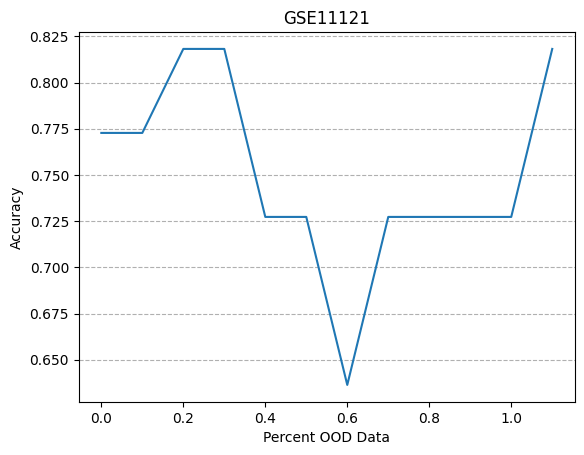

In [ ]:
x = np.array(log_percent)
y = np.array(accuracy)

plt.plot(x, y)
plt.title(ood)
plt.xlabel("Percent OOD Data")
plt.ylabel("Accuracy")
plt.grid(axis="y", linestyle='--')

plt.show()



---



In [ ]:
all_result_metas = []
rf = RandomForestClassifier()
scaler = StandardScaler()

In [ ]:
for d in dataset:
  ID = metas.drop(metas[metas["dataset"] == d].index)
  OOD = metas[metas["dataset"] == d]

  OOD_train, test = train_test_split(OOD, test_size=0.2, random_state=42)
  X_test = test.drop(["dataset", "metas"], axis=1)
  y_test = test["metas"]

  percent = 0;
  result = []
  log_percent = []

  while (percent <= 1):
    if (percent == 0):
      train = ID
    elif (percent == 1):
      train = pd.concat([ID, OOD_train], axis=0)
    else:
      train = pd.concat([ID, OOD_train.sample(frac=percent, random_state=42)], axis=0)

    X_train = train.drop(["dataset", "metas"], axis=1)
    y_train = train["metas"]

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    rf.fit(X_train_scaled, y_train)
    y_pred = rf.predict(X_test_scaled)

    result.append(round(accuracy_score(y_test, y_pred), 5))
    log_percent.append(round(percent, 2))
    percent += 0.1

  all_result_metas.append([d, result, log_percent])

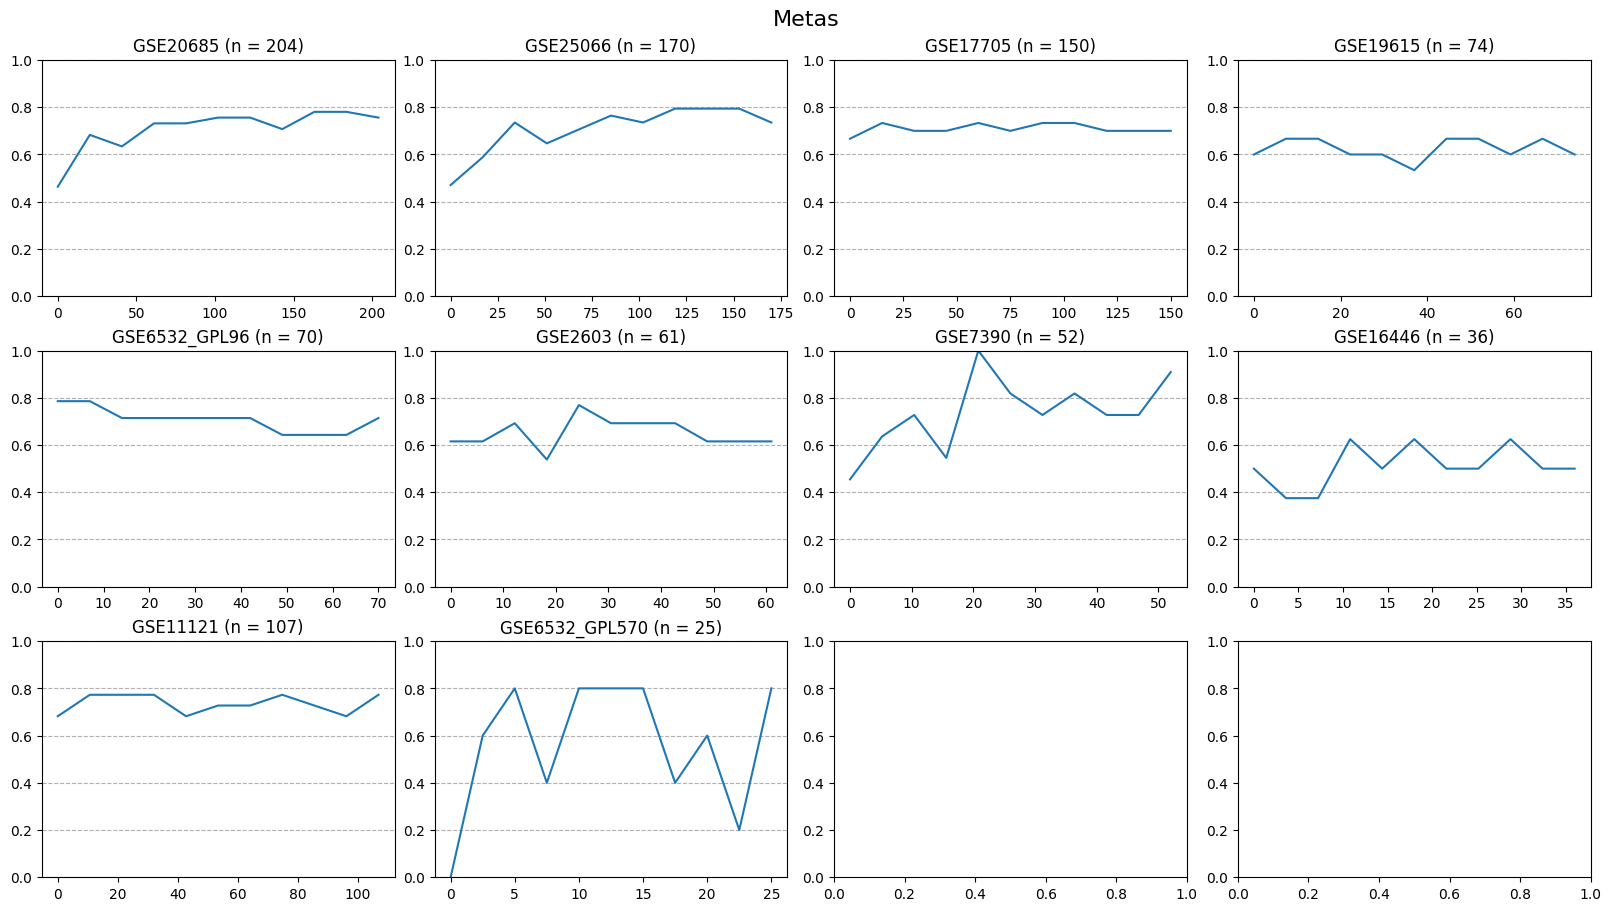

In [ ]:
fig, ax = plt.subplots(3, 4, figsize=(16, 9), layout='constrained')
# fig.tight_layout(pad=3)

for i in range(len(all_result_metas)):
  # x = np.array(all_result_metas[i][2])
  # y = np.array(all_result_metas[i][1])
  n = np.sum(metas["dataset"] == all_result_metas[i][0])

  sns.lineplot(ax=ax[i//4, i%4], x=np.array(all_result_metas[i][2])*n, y=np.array(all_result_metas[i][1]))

  ax[i//4, i%4].set_title(all_result_metas[i][0]+ " (n = " + str(n) + ")")
  # ax[i//4, i%4].set_xlabel("Datapoints")
  # ax[i//4, i%4].set_ylabel("Accuracy")
  ax[i//4, i%4].grid(axis="y", linestyle='--')
  ax[i//4, i%4].set_ylim(bottom=0, top=1)

fig.suptitle("Metas", fontsize=16)
plt.show()

#One Class SVM

In [ ]:
from sklearn.svm import OneClassSVM

In [ ]:
svm_detector = OneClassSVM(gamma='auto', nu=0.1).fit(X_colon_train)

In [ ]:
svm_detect = svm_detector.predict(df_colon)

In [ ]:
df_colon_svm_plot = pd.concat([df_colon_plot, pd.DataFrame(svm_detect, columns=["class"])], axis=1)

Text(0.5, 1.0, 'One Class SVM')

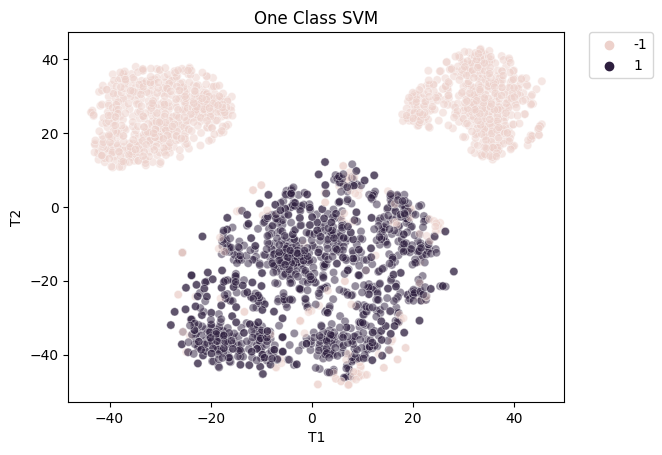

In [ ]:
sns.scatterplot(data=df_colon_svm_plot, x="T1", y="T2", hue="class", alpha=.5)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)
plt.title("One Class SVM")

In [ ]:
df_colon_svm_plot.value_counts("class")

class
 1    1194
-1    1119
dtype: int64